### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [2]:
import pandas as pd

col_names = (
    ["unit", "cycle"]
    + [f"setting_{i}" for i in range(1, 4)]
    + [f"sensor_{i}" for i in range(1, 22)]
)

file_path = "/train_FD001.txt"
df = pd.read_csv(
    file_path,
    sep="\s+",
    header=None,
    names=col_names
)

print("Shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2192570215.py:12: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+",


Shape: (20631, 26)

Data types:
unit           int64
cycle          int64
setting_1    float64
setting_2    float64
setting_3    float64
sensor_1     float64
sensor_2     float64
sensor_3     float64
sensor_4     float64
sensor_5     float64
sensor_6     float64
sensor_7     float64
sensor_8     float64
sensor_9     float64
sensor_10    float64
sensor_11    float64
sensor_12    float64
sensor_13    float64
sensor_14    float64
sensor_15    float64
sensor_16    float64
sensor_17      int64
sensor_18      int64
sensor_19    float64
sensor_20    float64
sensor_21    float64
dtype: object

First 5 rows:
   unit  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  sensor_3  \
0     1      1    -0.0007    -0.0004      100.0    518.67    641.82   1589.70   
1     1      2     0.0019    -0.0003      100.0    518.67    642.15   1591.82   
2     1      3    -0.0043     0.0003      100.0    518.67    642.35   1587.99   
3     1      4     0.0007     0.0000      100.0    518.67    642.35  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

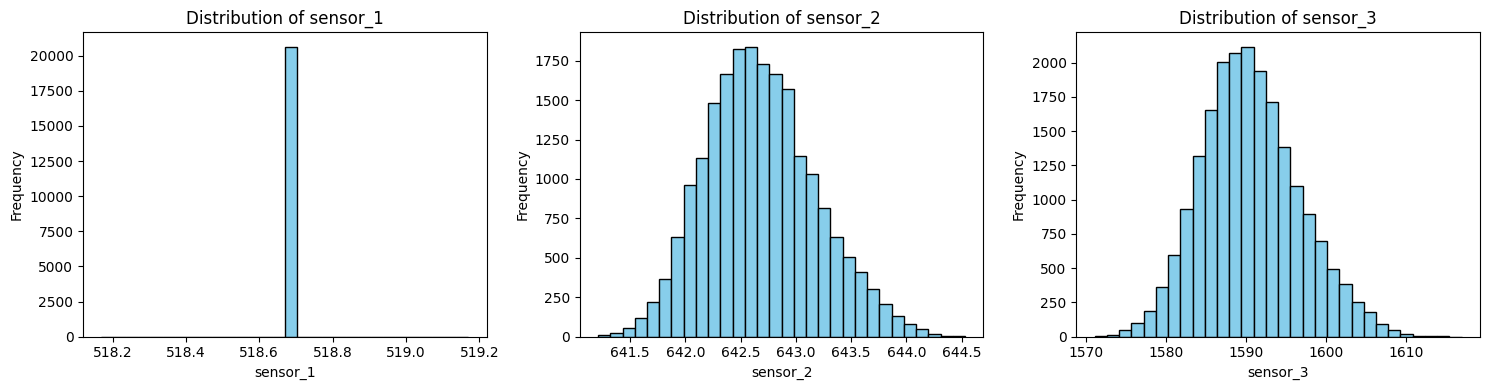

                         Missing Values  Percentage
unit                                  0         0.0
cycle                                 0         0.0
setting_1                             0         0.0
setting_2                             0         0.0
setting_3                             0         0.0
sensor_1                              0         0.0
sensor_2                              0         0.0
sensor_3                              0         0.0
sensor_4                              0         0.0
sensor_5                              0         0.0
sensor_6                              0         0.0
sensor_7                              0         0.0
sensor_8                              0         0.0
sensor_9                              0         0.0
sensor_10                             0         0.0
sensor_11                             0         0.0
sensor_12                             0         0.0
sensor_13                             0         0.0
sensor_14   

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

sensor_columns = ['sensor_1', 'sensor_2', 'sensor_3']

plt.figure(figsize=(15, 4))
for i, col in enumerate(sensor_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary)

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [7]:
df['sensor_2_mean_by_unit'] = df.groupby('unit')['sensor_2'].transform('mean')
df['sensor_2_std_by_unit'] = df.groupby('unit')['sensor_2'].transform('std')

df['sensor_2_rolling_mean_5'] = df.groupby('unit')['sensor_2'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())


print(df[['unit', 'cycle', 'sensor_2', 'sensor_2_mean_by_unit', 'sensor_2_std_by_unit', 'sensor_2_rolling_mean_5']].head())

   unit  cycle  sensor_2  sensor_2_mean_by_unit  sensor_2_std_by_unit  \
0     1      1    641.82             642.621042              0.486795   
1     1      2    642.15             642.621042              0.486795   
2     1      3    642.35             642.621042              0.486795   
3     1      4    642.35             642.621042              0.486795   
4     1      5    642.37             642.621042              0.486795   

   sensor_2_rolling_mean_5  
0               641.820000  
1               641.985000  
2               642.106667  
3               642.167500  
4               642.208000  


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [11]:
from sklearn.preprocessing import StandardScaler


sensor_cols = [col for col in df.columns if 'sensor' in col]


scaler = StandardScaler()

df_normalized = df.copy()
df_normalized[sensor_cols] = scaler.fit_transform(df[sensor_cols])

print("Head of Normalized DataFrame:")
print(df_normalized.head())

print("\nMean of Normalized Sensor Columns:")
print(df_normalized[sensor_cols].mean())

print("\nStandard Deviation of Normalized Sensor Columns:")
print(df_normalized[sensor_cols].std())

Head of Normalized DataFrame:
   unit  cycle  setting_1  setting_2  setting_3  sensor_1  sensor_2  sensor_3  \
0     1      1    -0.0007    -0.0004      100.0       0.0 -1.721725 -0.134255   
1     1      2     0.0019    -0.0003      100.0       0.0 -1.061780  0.211528   
2     1      3    -0.0043     0.0003      100.0       0.0 -0.661813 -0.413166   
3     1      4     0.0007     0.0000      100.0       0.0 -0.661813 -1.261314   
4     1      5    -0.0019    -0.0002      100.0       0.0 -0.621816 -1.251528   

   sensor_4      sensor_5  ...  sensor_15     sensor_16  sensor_17  sensor_18  \
0 -0.925936 -1.776357e-15  ...  -0.603816 -1.387779e-17  -0.781710        0.0   
1 -0.643726 -1.776357e-15  ...  -0.275852 -1.387779e-17  -0.781710        0.0   
2 -0.525953 -1.776357e-15  ...  -0.649144 -1.387779e-17  -2.073094        0.0   
3 -0.784831 -1.776357e-15  ...  -1.971665 -1.387779e-17  -0.781710        0.0   
4 -0.301518 -1.776357e-15  ...  -0.339845 -1.387779e-17  -0.136018        0.0 

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.